In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Battery.csv")  # default enconding did not work

df.head()

,INCIDENT ID,RECEIVED YEAR,RECEIVED MONTH,SOURCE,STATE,INCIDENT YEAR,INCIDENT MONTH,EXTERNAL CAUSE,PRODUCT 1,PRODUCT 1 HAZARD,...,VICTIM 2 INJURY,VICTIM 2 BODY PART,VICTIM 2 SEVERITY,VICTIM 3 GENDER,VICTIM 3 AGE YEARS,VICTIM 3 AGE MONTHS,VICTIM 3 INJURY,VICTIM 3 BODY PART,VICTIM 3 SEVERITY,INCIDENT DESCRIPTION
0,20230123-C6FFC-2147351205,2023,1,Consumer,HI,2022.0,12.0,NaN,Telephones or Telephone Accessories (550),Electrical - Other Electrical malfunction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I FOUND CRACKS IN THE BACK OF MY IPHONE WHEN I...
1,20230124-28771-4077470,2023,1,Online News Sources,NY,2023.0,1.0,NaN,Batteries (884),Electrical - Other Electrical malfunction,...,NaN,NaN,Hospital Admission,Unknown,NaN,NaN,NaN,NaN,Hospital Admission,HOUSE FIRE WHICH WAS SPARKED BY LITHIUM-ION B...
2,20230124-4741B-4077475,2023,1,Consumer,FL,2023.0,1.0,NaN,Hoverboards and powered skateboards (5025),Electrical - Other Electrical malfunction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 YOF USED [TWO WHEELED SELF BALANCING ELECTR...
3,20230124-90E12-2147351194,2023,1,Federal Government Agency,MD,2023.0,1.0,NaN,Batteries (884),Electrical - Other Electrical malfunction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FIRE DEPARTMENT ON NIH CAMPUS RESPONDED TO THE...
4,20230126-4A74E-4078036,2023,1,Online News Sources,NY,2023.0,1.0,NaN,Batteries (884),Electrical - Other Electrical malfunction,...,NaN,NaN,Emergency Department Treatment Received,Unknown,NaN,NaN,NaN,NaN,Emergency Department Treatment Received,FIREFIGHTERS RESPONDED TO AN AFTERNOON RESIDEN...


In [3]:
state_df = pd.DataFrame(df.groupby("STATE").size(), columns=["count"])
state_df.reset_index(inplace=True)

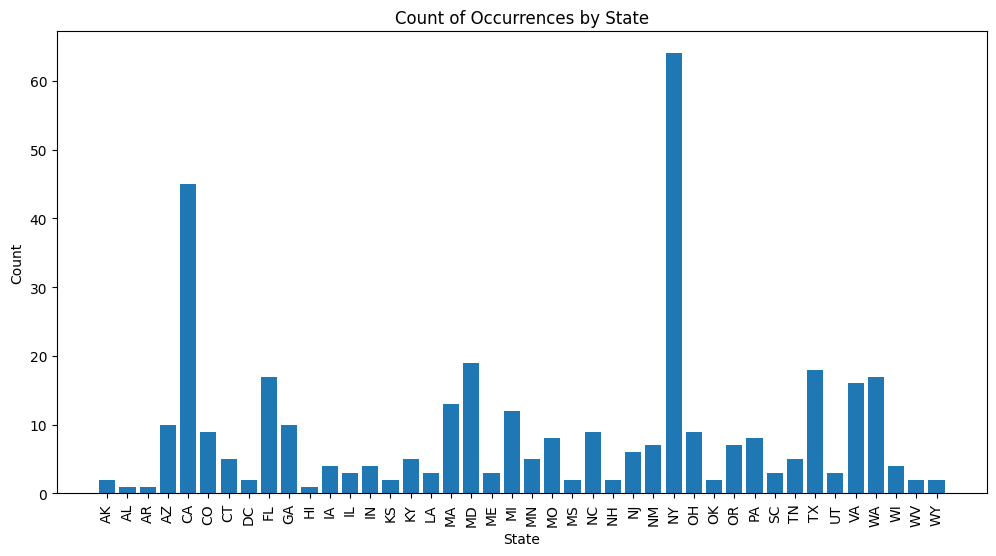

In [4]:
# Create a figure and axes objects
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart on the axes
ax.bar(x=state_df["STATE"], height=state_df["count"])

# Set labels and title
ax.set_xlabel("State")
ax.set_ylabel("Count")
ax.set_title("Count of Occurrences by State")

# Rotate x-axis labels by 90 degrees
ax.tick_params(axis='x', rotation=90)

# Show plot
plt.show()

In [5]:
# top 15 products 

product_df = pd.DataFrame(df.groupby("PRODUCT 1").size(), columns=["count"])
product_df.reset_index(inplace=True)

# sort
product_df.sort_values(by = "count", ascending=False).head(15)

,PRODUCT 1,count
4,Batteries (884),207
12,Computers (Equipment and Electronic Games) (557),23
52,Telephones or Telephone Accessories (550),12
31,Mopeds or Power-assisted Cycles (3215),10
25,Hoverboards and powered skateboards (5025),10
57,Toy Vehicles (Excluding Riding Toys) (5021),8
47,Scooters powered (5022),8
11,Combination Fire/Smoke Alarm and Carbon Monoxi...,8
16,Dolls Plush Toys and Action Figures (1394),6
61,Water Toys (1365),5


In [6]:
battries_description = pd.read_csv("incident_descriptions_batteries.csv")
battries_description

,INCIDENT DESCRIPTION
0,I FOUND CRACKS IN THE BACK OF MY IPHONE WHEN I...
1,HOUSE FIRE WHICH WAS SPARKED BY LITHIUM-ION B...
2,20 YOF USED [TWO WHEELED SELF BALANCING ELECTR...
3,FIRE DEPARTMENT ON NIH CAMPUS RESPONDED TO THE...
4,FIREFIGHTERS RESPONDED TO AN AFTERNOON RESIDEN...
...,...
380,I NOTICED THAT THE PLASTIC CASE FOR THE HALO A...
381,FIRE AND RESCUE DEPARTMENT CREWS WERE DISPATCH...
382,FLEX 24V POWER TOOL BATTERIES LEAKING ACID
383,PURCHASED A SMALL FAN TO ATTACH TO MY WORKOUT ...


In [7]:
# Text Analysis

# From Perplexity. I uploaded the Result.csv on Perplexity. 
# My Prompt: how to analyze the incident_description column using NLP in python?

import nltk
from nltk.corpus import stopwords
from collections import Counter

# creating a list out of incident description
incident_description = battries_description["INCIDENT DESCRIPTION"].tolist()

# Function to clean and preprocess text
def clean_text(text):
    cleaned = text.lower().replace('\n', ' ')
    tokens = nltk.word_tokenize(cleaned)
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    return ' '.join(cleaned_tokens)

# Apply the clean_text function to each description
cleaned_descriptions = []
for description in incident_description:
    cleaned_descriptions.append(clean_text(description))

# Create a frequency distribution of the words
word_freq = Counter(' '.join(cleaned_descriptions).split())

# Find the most common words
most_common_words = word_freq.most_common(100)
print("Most common words:", most_common_words)


Most common words: [('fire', 514), ('battery', 455), ('batteries', 164), ('smoke', 106), ('started', 98), ('one', 88), ('house', 87), ('consumer', 83), ('redacted', 81), ('responded', 80), ('lithium', 80), ('injuries', 80), ('charging', 70), ('home', 70), ('caused', 67), ('reported', 63), ('cause', 63), ('firefighters', 62), ('device', 62), ('power', 57), ('could', 55), ('two', 54), ('caught', 52), ('product', 49), ('hot', 48), ('found', 47), ('charger', 46), ('would', 45), ('inside', 44), ('time', 42), ('toy', 42), ('phone', 41), ('exploded', 41), ('2', 38), ('hospital', 37), ('apartment', 37), ('people', 35), ('purchased', 35), ('electric', 34), ('issue', 32), ('put', 32), ('due', 31), ('use', 31), ('plugged', 30), ('pack', 30), ('charge', 30), ('garage', 30), ('yom', 29), ('crews', 29), ('floor', 28), ('safety', 28), ('burned', 28), ('problem', 28), ('button', 28), ('charged', 27), ('injured', 27), ('melted', 27), ('damage', 27), ('decedent', 27), ('laptop', 27), ('case', 26), ('bac

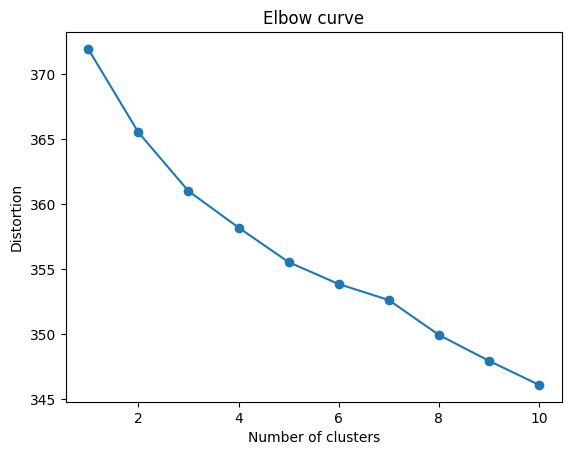

In [8]:
# clustering analysis

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Create a TF-IDF matrix from the incident descriptions
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(incident_description)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=422)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow curve')
plt.show()

# Perform K-Means clustering with the optimal number of clusters
num_clusters = 7  # Set the optimal number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=422)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['cluster'] = cluster_labels

# Print the DataFrame with cluster labels
#print(df)

# clustering isn't that helpful in this case

In [9]:
# Lithium ion batteries

import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("incident_descriptions_batteries.csv")

# Define keywords to search for
keywords = ["lithium-ion", "lithium ion", "lithium", "Lithium"]

# Filter rows containing the keywords in the 'incident_description' column
filtered_df = df[df['INCIDENT DESCRIPTION'].str.contains('|'.join(keywords), case=False)]

# Display the filtered DataFrame
print(filtered_df)


                                  INCIDENT DESCRIPTION
1    HOUSE FIRE  WHICH WAS SPARKED BY LITHIUM-ION B...
4    FIREFIGHTERS RESPONDED TO AN AFTERNOON RESIDEN...
10   DISCOVERED THE SOLAR BATTERY CASE CRACKED OPEN...
13   MY FRIEND  [REDACTED]  WAS WEARING PRIMITIVE S...
20   THE 15-MONTHS-OLD MALE DECEDENT INGESTED A LIT...
..                                                 ...
372  CONSUMER REPORTS THAT THE LITHIUM ION LAPTOP B...
375  FIREFIGHTERS RESPONDED TO AN EARLY-MORNING HIG...
378  HANDHELD PERCUSSION MASSAGER LITHIUM BATTERY E...
379  INVESTIGATORS WENT OVER TO A PROPERTY TO FIND ...
384  93 YOF DECEDENT SUFFERED HOUSE FIRE RELATED TO...

[159 rows x 1 columns]


In [10]:
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data (needed for lemmatization)
nltk.download('wordnet')

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("incident_descriptions_batteries.csv")

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define keywords to search for
keywords = ["lithium-ion", "lithium ion", "lithium"]

# Lemmatize the keywords
lemmatized_keywords = [lemmatizer.lemmatize(keyword.lower()) for keyword in keywords]

# Function to check if any keyword exists in the text
def contains_keyword(text):
    for keyword in lemmatized_keywords:
        if keyword in lemmatizer.lemmatize(text.lower()):
            return True
    return False

# Filter rows containing the keywords in the 'incident_description' column
filtered_df = df[df['INCIDENT DESCRIPTION'].apply(contains_keyword)]

# Display the filtered DataFrame
print(filtered_df)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/meetpatel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                  INCIDENT DESCRIPTION
1    HOUSE FIRE  WHICH WAS SPARKED BY LITHIUM-ION B...
4    FIREFIGHTERS RESPONDED TO AN AFTERNOON RESIDEN...
10   DISCOVERED THE SOLAR BATTERY CASE CRACKED OPEN...
13   MY FRIEND  [REDACTED]  WAS WEARING PRIMITIVE S...
20   THE 15-MONTHS-OLD MALE DECEDENT INGESTED A LIT...
..                                                 ...
372  CONSUMER REPORTS THAT THE LITHIUM ION LAPTOP B...
375  FIREFIGHTERS RESPONDED TO AN EARLY-MORNING HIG...
378  HANDHELD PERCUSSION MASSAGER LITHIUM BATTERY E...
379  INVESTIGATORS WENT OVER TO A PROPERTY TO FIND ...
384  93 YOF DECEDENT SUFFERED HOUSE FIRE RELATED TO...

[159 rows x 1 columns]


In [11]:
# each incident description
for i in filtered_df["INCIDENT DESCRIPTION"]:
    print(i)

HOUSE FIRE  WHICH WAS SPARKED BY LITHIUM-ION BATTERY  KILLED ONE OCCUPANT  WHO DIED IN HOSPITAL SUFFERING FROM SMOKE INHALATION AFTER BEING FOUND ON 2ND FLOOR OF HOUSE. OTHER 10 PEOPLE  INCLUDING FOUR FIREFIGHTERS  WERE INJURED & TAKEN TO HOSPITALS FOR TREATMENT.
FIREFIGHTERS RESPONDED TO AN AFTERNOON RESIDENCE FIRE. OCCUPANCY WAS CONTRARY TO CITY RECORD. AFTER THE FIRE  18 CHILDREN  1 OF THEM IN CRITICAL CONDITION  WERE TAKEN TO VARIOUS HOSPITALS FOR EVALUATION. LITHIUM-ION BATTERY WAS FOUND AT THE SCENE THAT HAD CAUSED THE FIRE.
DISCOVERED THE SOLAR BATTERY CASE CRACKED OPEN.  THE BATTERY HAD SWOLLEN TO PILLOW SIZE CAUSING ONE  SIDE TO CRACK ALL THE WAY OPEN.  (01/30/2023) THE CONSUMER HAS A SAFETY CONCERN IN REFERENCE TO THE BATTERY IN THE SOLAR CHARGER.  THE CONSUMER NOTICED THAT THE COVER OF THE UNIT WAS POPPING OUT OF THE CONTAINER. WHEN HE CHECKED  IT  HE SAW THAT THE LITHIUM BATTERY HAD SWOLLEN.
MY FRIEND  [REDACTED]  WAS WEARING PRIMITIVE SURVIVORS TL900 HEADLAMPS WHEN THE LIT

In [12]:
# # save lithium ion descriptions into a csv for text analysis using Orange3

# # Extract the 'incident_description' column
# incident_descriptions = filtered_df["INCIDENT DESCRIPTION"]

# # Create a new DataFrame with just the 'incident_description' column
# incident_df = pd.DataFrame({'INCIDENT DESCRIPTION': incident_descriptions})

# # Save the DataFrame to a CSV file
# incident_df.to_csv('incident_descriptions_lithium.csv', index=False)

In [13]:
# Text Analysis


import nltk
from nltk.corpus import stopwords
from collections import Counter

lithium_ion_descriptions = pd.read_csv("incident_descriptions_lithium.csv")

# creating a list out of incident description
incident_description = lithium_ion_descriptions["INCIDENT DESCRIPTION"].tolist()

# Function to clean and preprocess text
def clean_text(text):
    cleaned = text.lower().replace('\n', ' ')
    tokens = nltk.word_tokenize(cleaned)
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stopwords.words('english')]
    return ' '.join(cleaned_tokens)

# Apply the clean_text function to each description
cleaned_descriptions = []
for description in incident_description:
    cleaned_descriptions.append(clean_text(description))

# Create a frequency distribution of the words
word_freq = Counter(' '.join(cleaned_descriptions).split())

# Find the most common words
most_common_words = word_freq.most_common(100)
print("Most common words:", most_common_words)


Most common words: [('fire', 278), ('battery', 195), ('lithium', 80), ('batteries', 71), ('responded', 56), ('house', 48), ('firefighters', 48), ('smoke', 47), ('caused', 46), ('one', 42), ('started', 41), ('home', 40), ('injuries', 37), ('charging', 35), ('cause', 33), ('redacted', 31), ('found', 29), ('reported', 28), ('consumer', 24), ('apartment', 23), ('floor', 22), ('people', 21), ('injured', 20), ('garage', 20), ('two', 20), ('hospital', 19), ('scene', 19), ('crews', 18), ('building', 18), ('device', 18), ('inhalation', 17), ('electric', 17), ('inside', 16), ('yom', 16), ('ion', 16), ('problem', 15), ('charged', 15), ('taken', 14), ('charger', 14), ('product', 14), ('decedent', 13), ('time', 13), ('power', 13), ('damaged', 13), ('exploded', 12), ('flames', 12), ('fd', 12), ('minor', 12), ('hot', 12), ('several', 12), ('could', 12), ('company', 11), ('damage', 11), ('due', 11), ('morning', 11), ('officials', 11), ('caught', 11), ('google', 11), ('determined', 11), ('residential',

In [14]:
import pandas as pd
import re

# Load the CSV file into a Pandas DataFrame
df_lithium = pd.read_csv('incident_descriptions_lithium.csv')

# Define a list of keywords to search for
keywords = [
'Google Nest Protect',
'Yealink CP900',
'GoPro HERO8',
'Fitinoch rechargeable AA lithium batteries',
"Children's bath toys",
'Electric bikes (e-bikes)',
'Solar/battery systems',
'Flashlights',
'Electric scooters',
'Radio scanners',
'Bicycle lights',
'Electric unicycles',
'Primitive Survivors TL900 headlamps',
'Gateway GWTN141-10 laptops',
'Vape devices',
'E-cycles',
'E-bike shop',
'Laptop',
'Two-wheeled self-balancing electric scooter',
'Micro mobility devices'
]

# Search for the keywords in the 'INCIDENT DESCRIPTION' column
products = []
for keyword in keywords:
    matches = df_lithium[df_lithium['INCIDENT DESCRIPTION'].str.contains(keyword, case=False)]['INCIDENT DESCRIPTION'].tolist()
    if matches:
        products.append(keyword)

# Print the found products
print("Specific products and brands found:")
for product in products:
    print(product)

Specific products and brands found:
Google Nest Protect
Primitive Survivors TL900 headlamps
E-bike shop
Laptop


/var/folders/fq/n8rn1dtx6k34rv37c81hq01w0000gn/T/ipykernel_64897/2269375294.py:34: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matches = df_lithium[df_lithium['INCIDENT DESCRIPTION'].str.contains(keyword, case=False)]['INCIDENT DESCRIPTION'].tolist()


In [36]:
import pandas as pd

product = "Ryobi"

# Count the number of times "TL900" appears in the dataset
count = 0
for incident in df_lithium['INCIDENT DESCRIPTION']:
    if product.upper() in incident:
        count += 1

print(f"The term {product} appears {count} times in the dataset.")

The term Ryobi appears 2 times in the dataset.


In [37]:
# Find all sentences containing product
sentences = df_lithium[df_lithium['INCIDENT DESCRIPTION'].str.contains(product, case=False)]['INCIDENT DESCRIPTION'].tolist()

# Print the found sentences
for sentence in sentences:
    print(sentence)

MY RYOBI LITHIUM BATTERY WAS CHARGING AND EXPLODED AND CAUGHT FIRE.
RYOBI 40 VOLT LITHIUM BATTERY CAUGHT FIRE AND EXPLODED WHILE CHARGING..
